In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
df = pdd.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2019-12-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,70.287064
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.353882
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.749733


<function matplotlib.pyplot.show>

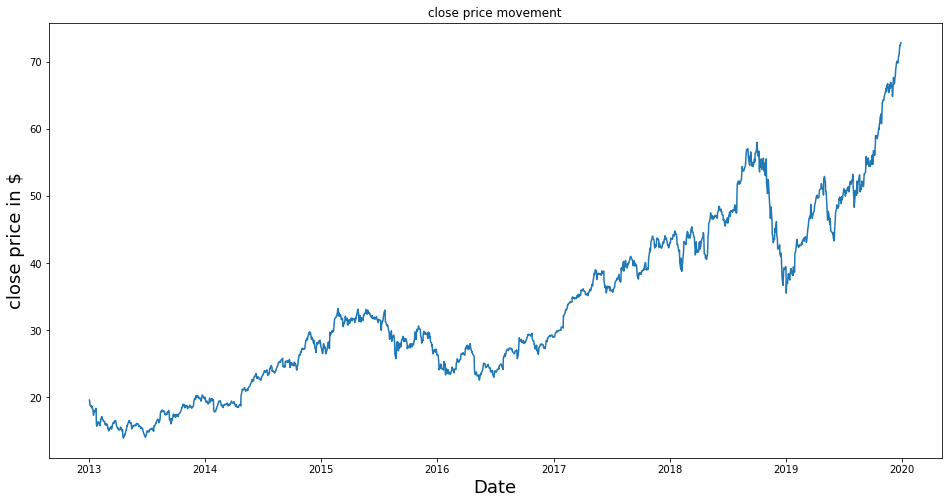

In [ ]:
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in $',fontsize=18)
plt.show

In [ ]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

1761

In [ ]:
training_data_size = math.ceil(len(dataset)*.70)
training_data_size

1233

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.09605419],
       [0.09185448],
       [0.08270357],
       ...,
       [0.99317021],
       [0.99270351],
       [1.        ]])

In [ ]:
train_data = scaled_data[0:training_data_size,:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)



[array([0.09605419, 0.09185448, 0.08270357, 0.08082492, 0.08167938,
       0.07670398, 0.08058859, 0.07864326, 0.06740158, 0.05780827,
       0.07003168, 0.06796515, 0.06634104, 0.06923175, 0.07483138,
       0.03634305, 0.0299071 , 0.035937  , 0.0410518 , 0.04017914,
       0.03936707, 0.03823381, 0.03138579, 0.04079123, 0.04049428,
       0.04708171, 0.05117841, 0.05417819, 0.04688778, 0.04634842,
       0.0460939 , 0.04219719, 0.04209414, 0.0353431 , 0.03365229,
       0.03653089, 0.03167668, 0.03541582, 0.03274932, 0.03082825,
       0.02420445, 0.01788972, 0.02461047, 0.02128948, 0.02427111,
       0.02496197, 0.02868899, 0.02296816, 0.02291968, 0.02543468,
       0.03219786, 0.03950647, 0.03876107, 0.03730053, 0.03769445,
       0.04325773, 0.04426978, 0.04279109, 0.03730053, 0.03159184])]
[0.023259054966759424]
[array([0.09605419, 0.09185448, 0.08270357, 0.08082492, 0.08167938,
       0.07670398, 0.08058859, 0.07864326, 0.06740158, 0.05780827,
       0.07003168, 0.06796515, 0.06

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1173, 60, 1)

In [ ]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1173/1173 [==============================] - 24s 20ms/step - loss: 3.1010e-04


In [ ]:
test_data = scaled_data[training_data_size - 60: ,:]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.6797424735444966

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

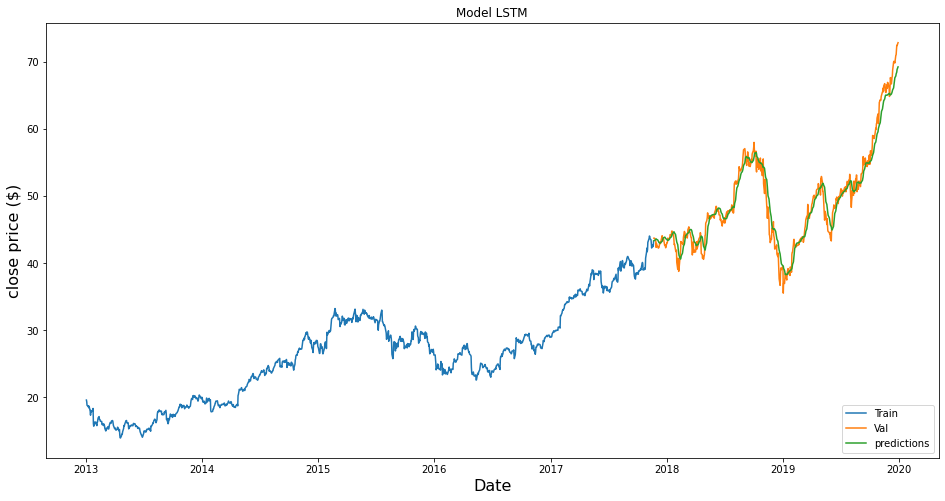

In [ ]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date',fontsize=16)
plt.ylabel('close price ($)' ,fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show


In [ ]:
valid

,Close,predictions
Date,,
2018-08-08,51.812500,49.073017
2018-08-09,52.220001,49.398232
2018-08-10,51.882500,49.675449
2018-08-13,52.217499,49.858307
2018-08-14,52.437500,50.012093
...,...,...
2020-12-23,130.960007,113.455971
2020-12-24,131.970001,114.172729
2020-12-28,136.690002,114.871353
